In [1]:
from elastML.features import FeaExtraction
from elastML.predict import model_predict
from mrmr import mrmr_regression

# material project ids

In [2]:
ids = ["mp-1007666","mp-10212","mp-66","mp-108"]

# extract features from the structures

In [3]:
api_key = "Esc2lnMk6K1iNVBEx0"

materials_id = {"material_id":{"$in":ids}}

fea = FeaExtraction(
                 materials_id,
                 api_key
                )

StrToComposition:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/4 [00:00<?, ?it/s]

#  Get the feature set for initial relevance calculation using mRmR

Pretrained models are trained on 150 features selected based on precomputed mRMR feature relevance, as described in the paper https://doi.org/10.26434/chemrxiv-2023-07vcr

In [5]:

features =fea.get_features()
target = fea.data[["K_VRH"]]


# mrmr

In [6]:


selected_features, relevance, redundancy =  mrmr_regression(X=features,
                                                            y=target, 
                                                            K=80,
                                                            relevance='f', 
                                                            redundancy='c', 
                                                            denominator='mean',
                                                            cat_features=None, 
                                                            cat_encoding='leave_one_out',
                                                            only_same_domain=False, 
                                                            return_scores=True,
                                                            n_jobs=-1, 
                                                            show_progress=True
                                            )

100%|██████████| 80/80 [00:44<00:00,  1.81it/s]


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, 'F16'),
  Text(0.0, 0, 'minimum_Number'),
  Text(25.0, 0, 'maximum_Row'),
  Text(50.0, 0, 'mode_NsValence'),
  Text(75.0, 0, 'maximum_NsUnfilled'),
  Text(100.0, 0, 'mean_NUnfilled'),
  Text(125.0, 0, 'avg_dev_GSbandgap'),
  Text(150.0, 0, 'maximum_first_ioniz'),
  Text(175.0, 0, 'F14'),
  Text(200.0, 0, '7-norm'),
  Text(225.0, 0, '')])

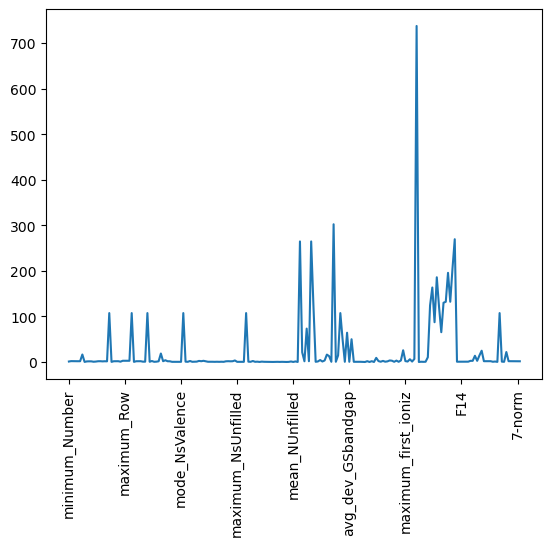

In [19]:
import matplotlib.pyplot as plt
relevance.plot()
plt.xticks(rotation = 90)

In [15]:
relevance.index

Index(['minimum_Number', 'maximum_Number', 'range_Number', 'mean_Number',
       'avg_dev_Number', 'mode_Number', 'minimum_MendeleevNumber',
       'maximum_MendeleevNumber', 'range_MendeleevNumber',
       'mean_MendeleevNumber',
       ...
       'band_gap', 'density', 'total_magnetization', 'vpa', '0-norm', '2-norm',
       '3-norm', '5-norm', '7-norm', '10-norm'],
      dtype='object', length=202)